# Homework 2


## References

+ Lectures 3-6 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.


**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope.

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

In [1]:
# Here are some modules that you may need - please run this block of code:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')
import numpy as np
import scipy
import scipy.stats as st
# A helper function for downloading files
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Problem 1 - Practice with discrete random variables

Consider the Categorical random variable:
$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$
taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**
<br><br>

In [3]:
# You can also answer with code here:
xs = np.array([0,1,2,3])
ps = [.3,.1,.2,.4]
X = st.rv_discrete(name = 'P1cat', values = (xs,ps))
print(X.expect())

1.7000000000000002


B. The variance $\mathbb{V}[X]$.

**Answer:**
<br><br>

In [4]:
# You can also answer with code here:
print(X.var())

1.6099999999999994


C. Plot the probability mass function of $X$.

Text(0, 0.5, '$p(x)$')

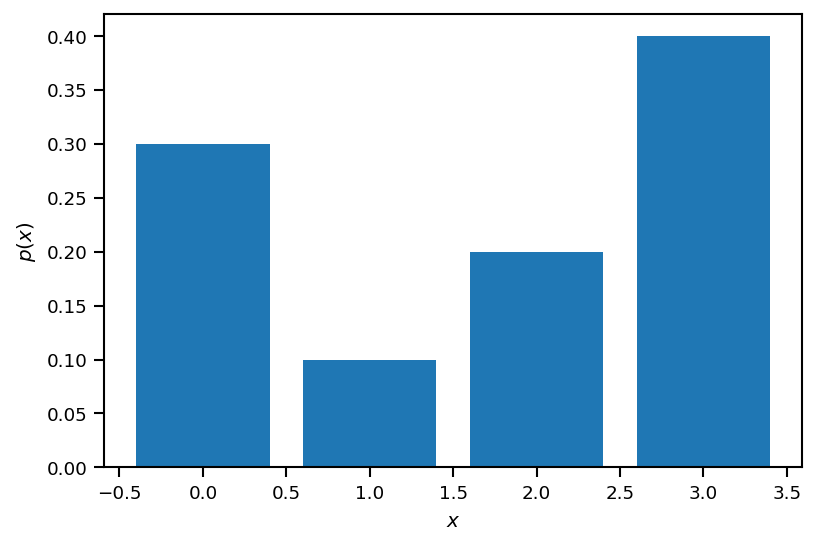

In [5]:
# Your code here. Hint: use a bar plot

fig, ax = plt.subplots(dpi=150)
ax.bar(xs, X.pmf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br><br>

In [8]:
# You can also answer with code here:

prob02=.3+.1+.2
print(prob02)

0.6000000000000001


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br> = $4\mathbb{E}[X] +3$
<br> = $4 * 1.7 +3$

In [9]:
# You can also answer with code here
4*1.7+3

9.8

F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br>=$16\mathbb{V}[X]$<br>

In [10]:
# You can also answer with code here:
16 * 1.61

25.76

## Problem 2 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may be unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

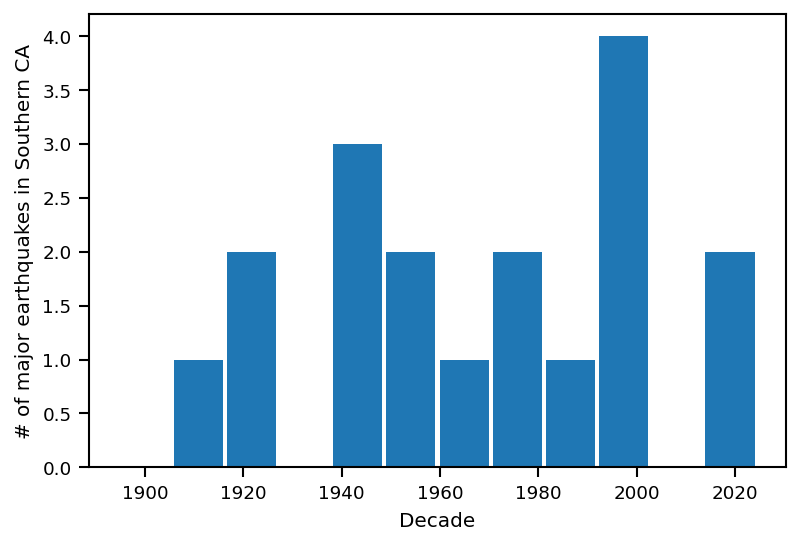

In [11]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:
$$
X \sim \operatorname{Poisson}(r),
$$
where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [13]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [15]:
X2 = st.poisson(r)

A. Plot the probability mass function of ``X``.

Text(0, 0.5, '$p(x)$')

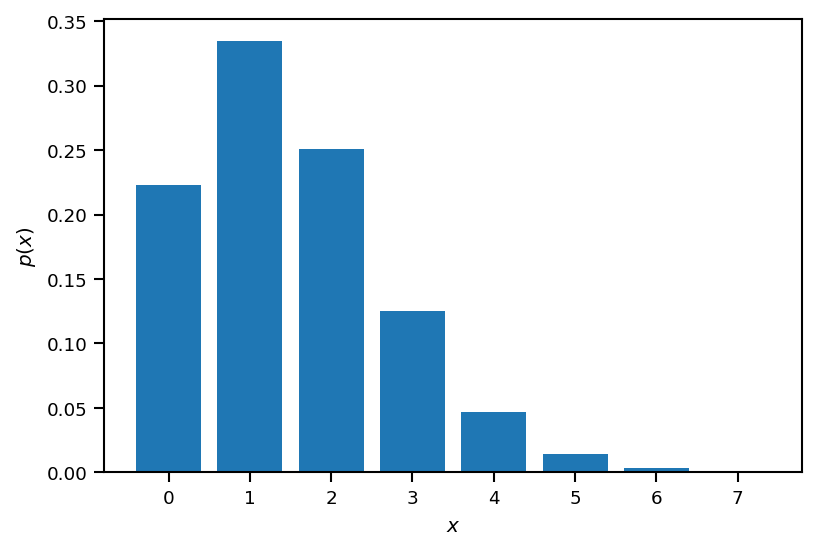

In [26]:
# Your code here

xs2 = ([0,1,2,3,4,5,6,7])
fig, ax = plt.subplots(dpi=150)
ax.bar(xs2, X2.pmf(xs2))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**

In [24]:
# You can also answer with code here:
X2.pmf(0)

0.22313016014842982

C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [ ]:
# You can also answer with code here:

D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [ ]:
# You can also answer with code here:

## Problem 3 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?
Well, when the gear is brand new, the probability density should be close to zero because a new gear does not fail under normal opearating conditions.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc. 
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

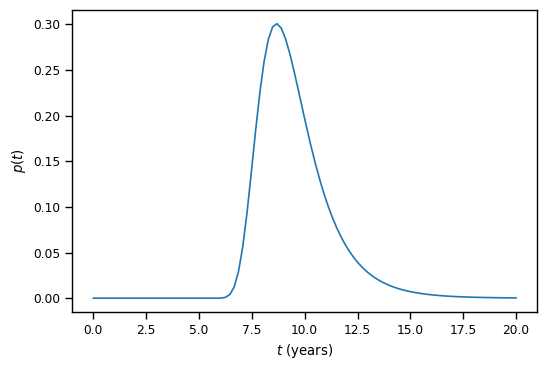

In [27]:
# Time to fail in years under normal operating conditions
# Each row is a different gear
time_to_fail_data = np.array([
    10.5,
    7.5,
    8.1,
    8.4,
    11.2,
    9.3,
    8.9,
    12.4
])

# Here is a Weibull distribution fitted to the data
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
# Fit picks the parameters of the data to match the distribution
# We will talk about what it does in subsequent lectures.

# Let's plot the probability density of this
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.pdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [34]:
# Your code here
t_mean = T.mean() # Change me
t_var = T.var() # Change me
print('E[T] = {0:1.2f}'.format(t_mean))
print('V[T] = {0:1.2f}'.format(t_var))

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function of $T$.

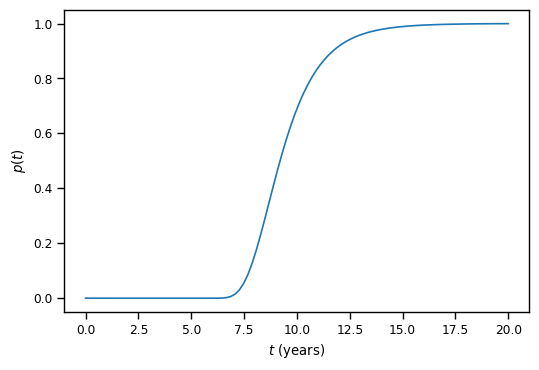

In [35]:
# Your code here
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, T.cdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:
$$
S(t) = p(T > t).
$$
Hint: First connect this function to the cumulative distribution function of $T$.

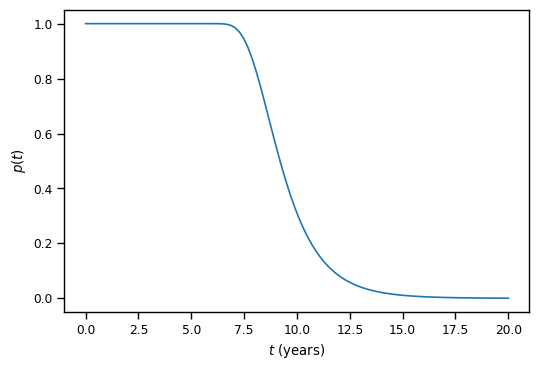

In [36]:
# Your code here
fig, ax = plt.subplots(dpi=100)
ts = np.linspace(0.0, 20.0, 100)
ax.plot(ts, 1-T.cdf(ts))
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$p(t)$');

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [44]:
# Your code here
p8to10 = T.cdf(10)-T.cdf(8)
print('this probability is {0:1.2f}'.format(p8to10))
T.cdf(7)

this probability is 0.53


0.011102755182106204

E. If you were to sell the gear, how many years "warranty" would you offer?<br>
**Answer:**
<br>7.5 years<br><br><br><br><br>

In [ ]:
# Your code here

## Problem 4 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [ ]:
P = np.array([[0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
        0.03776221, 0.00131325, 0.03760817, 0.01770659],
       [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
        0.04778769, 0.01021053, 0.00324185, 0.02475319],
       [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
        0.02187814, 0.01925662, 0.0196836 , 0.01996279],
       [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
        0.02352593, 0.00300314, 0.00103487, 0.04071951],
       [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
        0.02032679, 0.02536328, 0.03552956, 0.01107725]])

The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

In [ ]:
print('p(X=2, Y=3) = {0:1.3f}'.format(P[2, 3]))

A. Verify that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [ ]:
# Your code here

B. Find the marginal probability density of $X$:
$$
p(x) = \sum_{y}p(x,y).
$$
You can represent this as a 5-dimensional vector.

In [ ]:
# Hint, you can do this in one line if you read this:
help(np.sum)

C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

In [ ]:
# Your code here

D. Find the expectation and variance of $X$ and $Y$.

In [ ]:
# Your code here

E. Find the expectation of $E[X + Y]$.

In [ ]:
# Your code here

F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?

In [ ]:
# Your code here

G. Find the variance of $X + Y$.

In [ ]:
# Your code here

J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [ ]:
# Your code here

## Problem 5 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)) which connects the magnetic field $H$ to the magnetic flux density $B$.
The shape of this curve depends on the manufacturing process of the steel. As a result the $B-H$ differs across different suppliers but alos across time for the same supplier.

Let's use some real manufacturer data to visualize these differences.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
It will take a while to explain how to upload data on Google Colab.
We will do it in the next homework set.
For now, you should just know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter notebook.
We have written a piece of code that allows you to put the data file in the right place without too much trouble.
Simply run the following:

In [ ]:
url = 'https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv'
download(url)

If everything worked well, then the following will work:

In [ ]:
# Load the data - You need the B_data.csv
B_data = np.loadtxt('B_data.csv')
# This file contains a single matrix the shape of which is:
print(B_data.shape)

The rows (200) corresponds to different samples of the $B-H$ curves (different suppliers and different times).
The columns (1500) corresponds to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the a specific value of $H$, say $H_j$. The values of $H$ are the equidistant and identical and we are going to ignore them in this analysis.
Let's visualize some of the samples.

In [ ]:
# Here is one sample
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[0, :])
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

In [ ]:
# Here are five samples
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[:5, :].T)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

In [ ]:
# Here are all the samples
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable
$$
X = B(H_{500}),
$$
for this reason. Extract and do a histogram of the data for $X$:

In [ ]:
X_data = B_data[:, 500]
fig, ax = plt.subplots(dpi=100)
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel('$x$')
ax.set_ylabel('Histogram');

This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
We are not going to explain why, but a good choice for the mean is the empirical average of the data:
$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$
That is:

In [ ]:
mu_500 = X_data.mean()
print('mu_500 = {0:1.2f}'.format(mu_500))

Similarly, for the variance a good choice is the empirical variance defined by:
$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$
That is:

In [ ]:
sigma2_500 = np.var(X_data)#.var()
print('sigma_500 = {0:1.2e}'.format(sigma2_500))

Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

In [ ]:
# Your code here

B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is geater than 1.66 T.

In [ ]:
# Your code here

C. Let us now consider another random variable
$$
Y = B(H_{1000}).
$$
Isolate the data for this as well:

In [ ]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

In [ ]:
# Your code here

D. From the scatter plot, it looks like the random vector
$$
\mathbf{X} = (X, Y),
$$
follows a multivariate normal distribution. What would be the mean and covariance of the distribution.
Well, first organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [ ]:
XY_data = np.hstack([X_data[:, None], Y_data[:, None]])

The mean vector is:

In [ ]:
mu_XY = np.mean(XY_data, axis=0)
print(mu_XY)

The covariance matrix is a little bit trickier. 
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:
$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$
This is how you can find it:

In [ ]:
# Careful with np.cov because it requires you to transpose the matrix
C_XY = np.cov(XY_data.T)
print(C_XY)

Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
**Answer:**
<br><br>

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [ ]:
# Your code here

F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

In [ ]:
# Your code here

G. Now, let's think each $B-H$ curve as a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the values of the magnetic flux density at a fixed number of $H$-values. It is:
$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$
It is like $\mathbf{X} = (X, Y)$ only now we have 1500 dimensions instead of $2$.
First, let's find the mean of this random vector:

In [ ]:
B_mu = np.mean(B_data, axis=0)
# Let's plot the mean on top of the data
# Here are all the samples
fig, ax = plt.subplots(dpi=100)
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.plot(B_mu)
ax.set_xlabel('Index $j$')
ax.set_ylabel('$B$ (T)');

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [ ]:
B_cov = np.cov(B_data.T)

Let's plot this matrix:

In [ ]:
fig, ax = plt.subplots(dpi=100)
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c)

You see that the values are quite a bit correlated. This makes sense because the curves are all very smooth and they look very much alike. But let's check if the covariance is indeed positive definite:

In [ ]:
print('Eigenvalues of B_cov:')
print(np.linalg.eigh(B_cov)[0])

Hmm, notice that there are several eigenvalues that are negative, but they are too small. Very close to zero. This happens very often in practice when you are finding the covariance of a very large random vectors. It arises from the fact that we are using floating point arithmetic instead of a real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate normal random vector using ``scipy.stats`` it would fail.
Try this:

In [ ]:
B = st.multivariate_normal(mean=B_mu, cov=B_cov)

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution does not change very much. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [ ]:
# Pick the nugget here
nugget = 1e-12
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by 10.')

H. Now you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$ you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to perfectly control the production of steel. Take 10 samples of this random vector and plot them.

In [ ]:
# Your code here